In [65]:
!pip install tensorflow

In [66]:
import tensorflow as tf

print(tf.__version__)

2.17.1


In [67]:
## import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
# divide the dataset into independent and dependent features

x = dataset.iloc[:,3:13]
y = dataset.iloc[:, 13]

x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [70]:
# feature engineering

geography = pd.get_dummies(x['Geography'], drop_first = True)
gender = pd.get_dummies(x['Gender'], drop_first = True)

In [71]:
x = x.drop(['Geography', 'Gender'], axis = 1)

In [72]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [73]:
x = pd.concat([x, geography, gender], axis = 1)

In [74]:
# splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [75]:
# feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [76]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [77]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [78]:
x_train.shape

(8000, 11)

In [79]:
# create ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ReLU
from tensorflow.keras.layers import Dropout

In [80]:
# initialize the ANN

classifier = Sequential()

In [81]:
# adding the input layer

classifier.add(Dense(units = 11, activation='relu'))

In [82]:
# adding the first hidden layer

classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))

In [83]:
# adding the second hidden layer

classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.2))

In [84]:
# adding the output layer

classifier.add(Dense(1, activation='sigmoid'))

In [85]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [87]:
# early stopping

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.0001, patience=20, verbose=1, mode="auto", baseline=None, restore_best_weights=False)

In [88]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7946 - loss: 0.5142 - val_accuracy: 0.7955 - val_loss: 0.4410
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7904 - loss: 0.4554 - val_accuracy: 0.7955 - val_loss: 0.4194
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7912 - loss: 0.4344 - val_accuracy: 0.7955 - val_loss: 0.3960
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8190 - loss: 0.4070 - val_accuracy: 0.8455 - val_loss: 0.3906
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8130 - loss: 0.4279 - val_accuracy: 0.8432 - val_loss: 0.4013
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8194 - loss: 0.4159 - val_accuracy: 0.8485 - val_loss: 0.3909
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8340 - loss: 0.3900 - val_accuracy: 0.8413 - val_loss: 0.3864
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8246 - loss: 0.4017 -

In [89]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

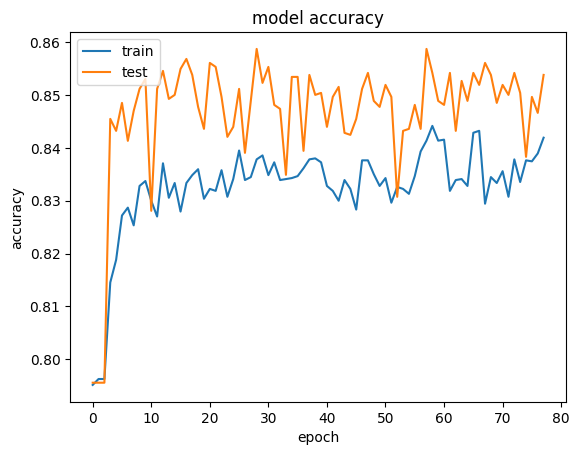

In [90]:
# visulization of accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

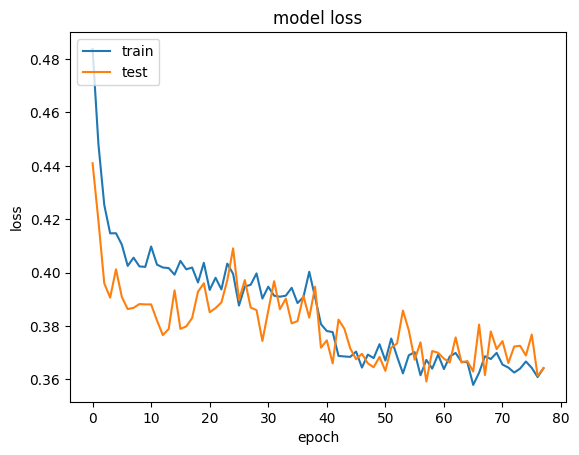

In [91]:
# visulization of loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
# prediction

y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [93]:
# confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1478,  117],
       [ 173,  232]])

In [94]:
# calculate accuracy

from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)
score

0.855

In [95]:
# get the weights

classifier.get_weights()

[array([[-7.79983401e-02, -2.78975129e-01,  8.33534524e-02,
          3.11552763e-01,  9.66382548e-02,  2.02915311e-01,
         -6.18966103e-01, -2.74520982e-02,  8.43172550e-01,
         -5.34337997e-01, -6.77767873e-01],
        [-1.89229119e+00, -1.78757995e-01, -3.61496806e+00,
          1.35824311e+00, -3.68284047e-01,  1.74530101e+00,
          2.90380083e-02,  1.46587503e+00, -1.14042127e+00,
          2.91953874e+00,  2.05921993e-01],
        [-3.98929983e-01,  1.51775050e+00,  3.86619717e-01,
          5.28487042e-02, -2.54599512e-01,  8.60764161e-02,
         -4.68086638e-03,  2.44643744e-02,  9.04918671e-01,
          3.20439786e-01,  5.66459119e-01],
        [-1.01177037e+00, -1.08973360e+00,  3.19017291e-01,
         -2.51904273e+00, -4.65813208e+00, -1.59310317e+00,
         -2.24269676e+00,  6.84547544e-01, -2.09978962e+00,
          2.12565541e-01,  3.14936399e+00],
        [-2.20087600e+00,  6.97596967e-01, -6.79394245e-01,
         -5.02256584e+00,  1.02383196e+00,  